# EDA

## Exploración

En esta sección se organizara y preparará los datos, para identificar fallos en la recogida, diseño evaluar, datos ausentes, identificar casos atípicos.

Algunas preguntas para iniciar:

¿Hay sesgos en los datos?

¿Existen errores en la codificación de los datos?

¿Cómo se presentan los datos y cuál es la mejor forma de visualizarlos?

¿Exisisten datos atípicos(outliers)?¿Cuáles son? ¿Cómo tratarlos?

¿Hay datos faltantes(missing) y cómo se deberían tratar?

In [1]:
import pandas as pd
data_arg=pd.read_csv('../data/---datos limpios/df_propiedades.csv')

In [2]:
data_arg.sample(5)

,localidad,id,ad_type,start_date,end_date,created_on,lat,lon,país,provincia,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
489213,Lomas de Zamora,5UWjPai+X8clbBP5dlA7nA==,Propiedad,2021-04-07,9999-12-31,2021-04-07,-34.775810,-58.378223,Argentina,Bs.As. G.B.A. Zona Sur,...,0.0,649.0,412.0,185000.0,USD,NaN,Venta Lote c/ mejoras,"Venta Lote c/ mejoras medidas: 17,32 x 43. Sup...",Lote,Venta
603506,General San Martín,vLccDHPWOoiyZbQkdh9VXw==,Propiedad,2020-08-06,2020-09-02,2020-08-06,-34.549853,-58.550439,Argentina,Bs.As. G.B.A. Zona Norte,...,1.0,187.0,127.0,199000.0,USD,NaN,Local comercial al frente + vivienda,Corredor Responsable: Uno Bienes Raices SRL - ...,Local comercial,Venta
219611,Rosario,a1arREBkJTS6DXY5K0P02w==,Propiedad,2020-09-25,9999-12-31,2020-09-25,-32.953937,-60.635917,Argentina,Santa Fe,...,1.0,47.0,45.0,78000.0,USD,Mensual,Departamento - Centro,"Scuba 38 - Laprida 1353 , Un dormitorio A estr...",Departamento,Venta
328610,Recoleta,k/bczvUNAmWb/4tHPH5WmA==,Propiedad,2021-01-25,9999-12-31,2021-01-25,-34.594781,-58.401736,Argentina,Capital Federal,...,3.0,203.0,203.0,440000.0,USD,Mensual,Av. Santa Fe y Pueyrredon - Recoleta - Capital...,Piso de 6 ambientes en excelente zona:<br>- 20...,Departamento,Venta
525868,Godoy Cruz,sG3WvuTR2wiosAB8LD0/pA==,Propiedad,2020-10-26,2020-12-23,2020-10-26,-32.953783,-68.855484,Argentina,Mendoza,...,0.0,649.0,412.0,450000.0,USD,NaN,Espectacular oportunidad de inversión,<b>Espectacular oportunidad de inversión</b><b...,Lote,Venta


In [3]:
data_arg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609185 entries, 0 to 609184
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   localidad        609185 non-null  object 
 1   id               609185 non-null  object 
 2   ad_type          609185 non-null  object 
 3   start_date       609185 non-null  object 
 4   end_date         609185 non-null  object 
 5   created_on       609185 non-null  object 
 6   lat              609185 non-null  float64
 7   lon              609185 non-null  float64
 8   país             609185 non-null  object 
 9   provincia        609185 non-null  object 
 10  rooms            609185 non-null  float64
 11  bedrooms         609185 non-null  float64
 12  bathrooms        609185 non-null  float64
 13  surface_total    609185 non-null  float64
 14  surface_covered  609185 non-null  float64
 15  price            609185 non-null  float64
 16  currency         609185 non-null  obje

¿Qué variables tenemos?

In [4]:
print(data_arg.columns)

Index(['localidad', 'id', 'ad_type', 'start_date', 'end_date', 'created_on',
       'lat', 'lon', 'país', 'provincia', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')


RECORDAMOS: El objetivo es crear un modelo de machine learning que prediga precios de propiedades en Argentina, solo el tipo de operación venta y en dolares. 

¿Estas variables influyen o impactan en el precio de las propiedades(variable dependiente)?

Los posibles features:


* localidad
* provincia
* lat y lon
* rooms
* bedrooms
* bathrooms
* surface_total
* surface_covered
* property_type                  

Descartadas:
* currency: es el tipo de moneda, que ya lo filtre anteriormente solo propiedades en USD(dolares)
* operation_type: porque solo me interesan las propiedad de venta y anteriormente se filtro por el tipo de operación venta.

¿Los datos estan en el tipo de dato correcto?

In [5]:
data_arg.dtypes

localidad           object
id                  object
ad_type             object
start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
país                object
provincia           object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
price_period        object
title               object
description         object
property_type       object
operation_type      object
dtype: object

¿Esos posibles features tienen datos nulos?

In [6]:
data_arg.isnull().sum()

localidad               0
id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                     0
lon                     0
país                    0
provincia               0
rooms                   0
bedrooms                0
bathrooms               0
surface_total           0
surface_covered         0
price                   0
currency                0
price_period       387123
title                   1
description            24
property_type           0
operation_type          0
dtype: int64

Insight las posibles features:

* No contienen datos nulos
* La mayoria de datos estan en float, excepto: provincia, localidad, tipo de propiedad, que estan en object

In [7]:
data_arg[["lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]].describe(percentiles=[i/10 for i in list(range(1, 10))+[0.01 ,0.99]]). round(1). T


,count,mean,std,min,0.1%,9.9%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
lat,609185.0,-34.6,1.8,-54.8,-42.8,-37.1,-37.1,-34.8,-34.7,-34.6,-34.6,-34.6,-34.5,-34.4,-32.9,-22.0
lon,609185.0,-59.2,2.3,-72.9,-71.6,-60.9,-60.9,-58.9,-58.7,-58.6,-58.5,-58.4,-58.4,-58.4,-58.0,-53.7
rooms,609185.0,2.5,1.8,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,4.0,5.0,40.0
bedrooms,609185.0,1.7,1.9,-16.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,900.0
bathrooms,609185.0,1.4,1.1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,20.0
surface_total,609185.0,267.6,1325.1,10.0,12.0,48.0,48.0,60.0,60.0,70.0,100.0,200.0,240.0,297.0,649.0,100000.0
surface_covered,609185.0,1201.1,768980.2,1.0,2.0,42.0,42.0,54.0,54.0,62.0,84.0,150.0,171.0,230.0,412.0,600000000.0


Insight:

* Lat y lon tienen valores razonables para propiedades en Argentina.

* rooms: el maximo 40 --> parece outlier

* bedrooms: el min es -16 es un error, el max 900 tambien parece un error

* bathrooms: maximo 20 puede ser posible, pero poco común. Revisar si es outlier

* superficie total: 

 la mediana es 267 m2

el max 100.000 m2 probablemente sea un error

* superficie cubierta: 

la media: 1201 es raro, porque es más grande que la mediana de superficie total

el maximo: 600.000.000. Es un error 

In [8]:
#eliminar los valore negativos de bedrooms
data_arg = data_arg[data_arg['bedrooms']>= 0]

## Distribución de variable target: price

¿Cómo esta distribuido el precio de las propiedades?

In [9]:
data_arg.price.describe().round(1)

count       609183.0
mean        223921.7
std         468028.4
min              0.0
25%          75000.0
50%         130000.0
75%         240000.0
max      111111111.0
Name: price, dtype: float64

Insight:

El precio promedio es 223.921, pero hay precios de propiedades que cuestan 0 y otras muchisimo más 111 millones, que son outiliers. Por lo que la desviación estándar es muy alta: 468.028, porque que nos dice que hay una gran diferencia de precios.

Se realiza un histograma y log-histograma para ver la distribución de precio. 

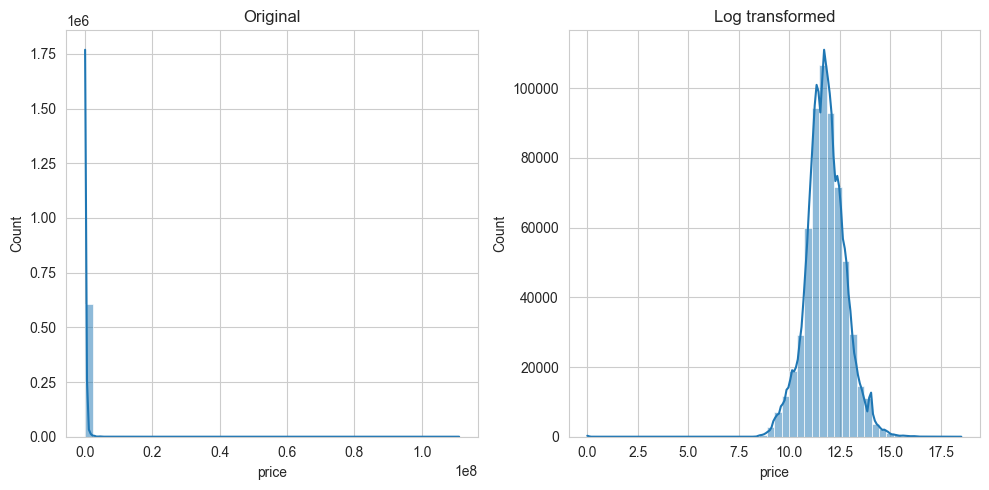

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))

# Histograma original
plt.subplot(1, 2, 1)
sns.histplot(data_arg['price'], bins=50, kde=True)
plt.title('Original')

# Histograma con log1p
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(data_arg['price']), bins=50, kde=True)
plt.title('Log transformed')

plt.tight_layout()

Insight distribución original:

* Hay un **sesgo positivo** porque hay una alta concentración de precios bajos, y valores extremadamente altos (outliers) que estiran la escala hacia la derecha.



¿Cómo tratar los outliers?

In [11]:
data_arg[data_arg['price'] == 0].shape

(129, 22)

In [12]:
#contar los valores extremos que tengo
data_arg[data_arg['price'] > 2_000_000].shape

(3347, 22)

Insight:

Valores extremos:

* Hay 3.347 propiedades con price > 2.000.000 (≈ 0.5% del dataset).

* Hay 129 propiedades con price = 0, que probablemente son errores o valores faltantes codificados como cero.

In [13]:
#se elimina las propiedades ==0 porque no son una propiedad real
data_arg = data_arg[data_arg['price'] > 0]


In [14]:
data_arg['price'].quantile(0.99)

np.float64(1500000.0)

In [15]:
data_arg['price'].quantile(0.995)

np.float64(2200000.0)

In [16]:
import numpy as np
#  Capear outliers al percentil 99.5
cap_value = data_arg['price'].quantile(0.995)
data_arg['price_capped'] = np.where(data_arg['price'] > cap_value, cap_value, data_arg['price'])

data_arg['log_price']= np.log(data_arg['price_capped'])

In [17]:
data_arg.log_price.describe().round(1)

count    609054.0
mean         11.8
std           1.0
min           0.0
25%          11.2
50%          11.8
75%          12.4
max          14.6
Name: log_price, dtype: float64

<Axes: xlabel='log_price', ylabel='Count'>

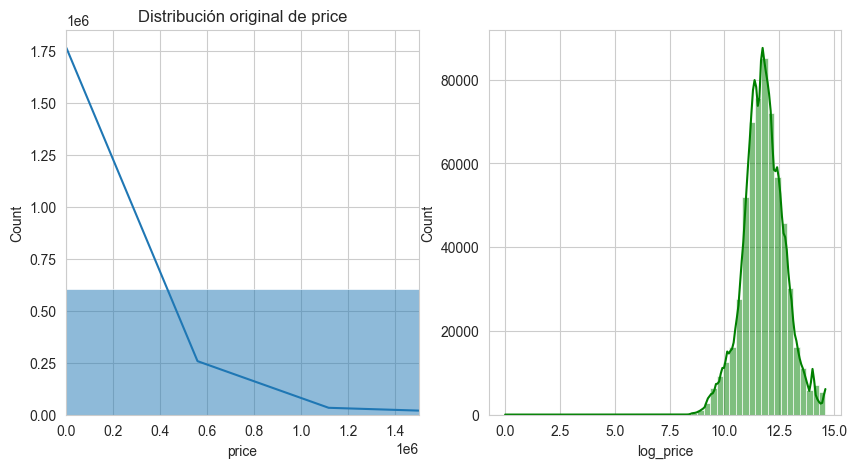

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))

# Histograma original
plt.subplot(1, 2, 1)
sns.histplot(data_arg['price'], bins=50, kde=True)
plt.title('Distribución original de price')
plt.xlabel('price')
plt.xlim(0, data_arg['price'].quantile(0.99))  # para evitar aplastamiento por outliers

# Histograma log-transformado
plt.subplot(1, 2, 2)
sns.histplot(data_arg['log_price'], bins=50, kde=True, color='green')


Resultado final: log_price se convierte en nuestra variable target ideal para el análisis y el modelado.

## Distribución: rooms,bedrooms, bathrooms

In [21]:
data_arg[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']].describe().round(1)


,rooms,bedrooms,bathrooms,surface_total,surface_covered
count,609054.0,609054.0,609054.0,609054.0,609054.0
mean,2.5,1.7,1.4,267.5,1201.3
std,1.8,1.9,1.1,1325.2,769062.9
min,0.0,0.0,0.0,10.0,1.0
25%,1.0,1.0,1.0,60.0,54.0
50%,2.0,1.0,1.0,100.0,84.0
75%,4.0,3.0,2.0,240.0,171.0
max,40.0,900.0,20.0,100000.0,600000000.0


Valores extremos:

*Rooms*
* Max -->40. Probablemente sea un outlier

*Bedrooms*
* Max -->900. Es un valor outlier

*Bathrooms*
* Max -->20. Es un valor inusual

*Surface_total*
* std: 1325.2 es muy alta con respecto al promedio que es 267.5. Lo que indica que hay propiedades extremadamente grandes en comparación con la media.

* Max:  100,000 m², lo que es una superficie extremadamente grande, y podría reflejar propiedades comerciales o grandes terrenos.

*Surface_covered*

* std: 769062.9 refleja una gran variabilidad con respecto a la media.

* Max: 600.000.000 es un valor extremadamente alto y probablemente sea un error en la carga de datos o propiedades expecionales(terrenos muy grandes)

¿El precio aumenta con más habitaciones, baños, dormitorios?

In [22]:
import numpy as np

In [23]:
data_arg['log_price'] = np.log1p(data_arg['price'])


In [24]:
# Seleccionar variables de interés
vars_of_interest = ['log_price', 'surface_total', 'surface_covered', 'bedrooms', 'bathrooms']

# Correlación
correlation_matrix = data_arg[vars_of_interest].corr()

# Mostrar correlación con log_price
print(correlation_matrix['log_price'].sort_values(ascending=False))


log_price          1.000000
bathrooms          0.568389
bedrooms           0.336809
surface_total      0.025565
surface_covered    0.002582
Name: log_price, dtype: float64


## Distribución de superficie